In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory data analysis

Loading datasets

In [2]:
train = pd.read_csv(r"C:\Users\jbnay\Downloads\train_LZdllcl.csv")
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
train.shape

(54808, 14)

In [4]:
test = pd.read_csv(r"C:\Users\jbnay\Downloads\test_2umaH9m.csv")
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
test.shape

(23490, 13)

In [6]:
# train dataset

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [9]:
#Visualization

<Axes: xlabel='department', ylabel='count'>

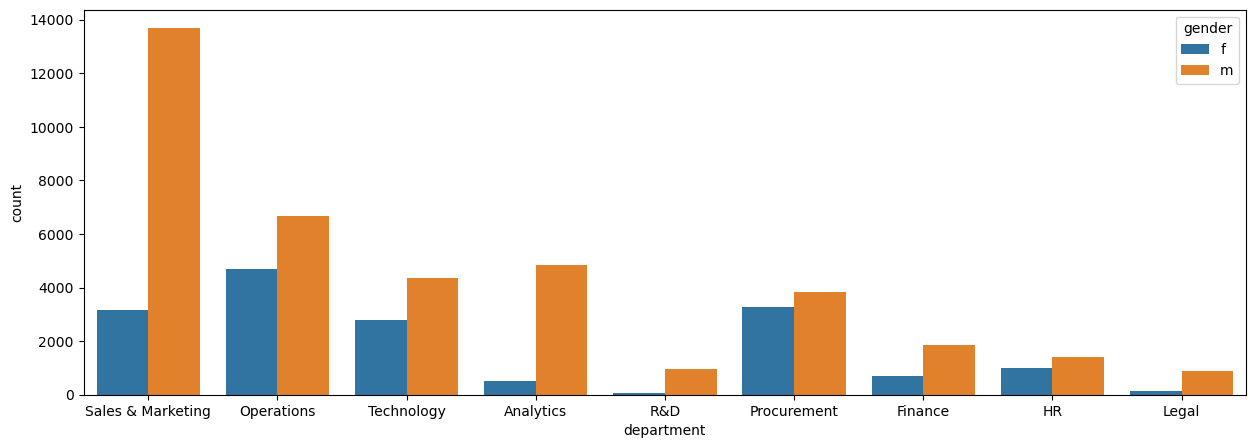

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(x = train.department, hue = train.gender)

<Axes: xlabel='age', ylabel='count'>

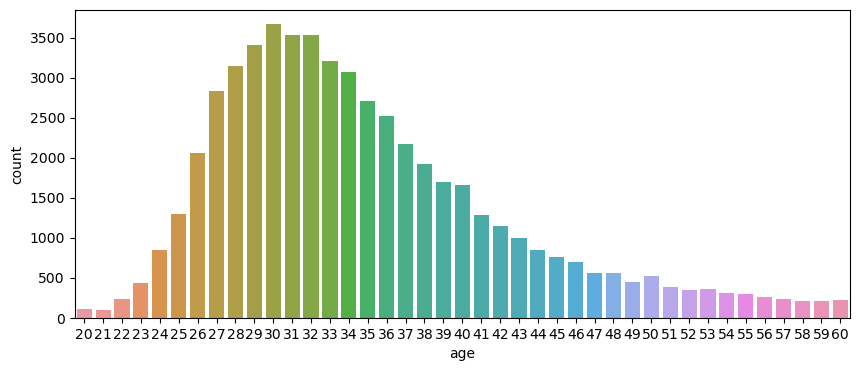

In [11]:
plt.figure(figsize=(10,4))
sns.countplot(x = train.age.sort_values())

<Axes: xlabel='length_of_service', ylabel='count'>

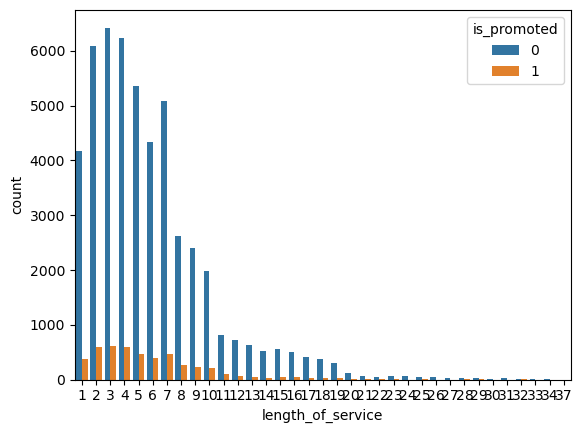

In [12]:
sns.countplot(x = train.length_of_service,hue=train.is_promoted ) 


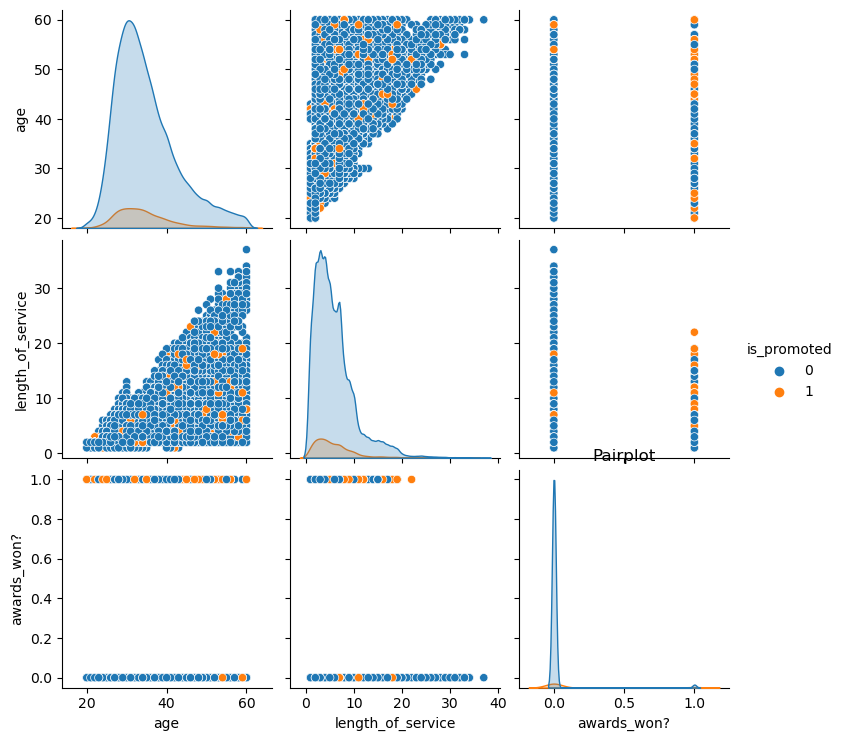

In [13]:
sns.pairplot(train,hue='is_promoted',vars =['age','length_of_service','awards_won?'])
plt.title('Pairplot')
plt.show()

C:\Users\jbnay\AppData\Local\Temp\ipykernel_2200\4087115319.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot = True, cmap='mako')


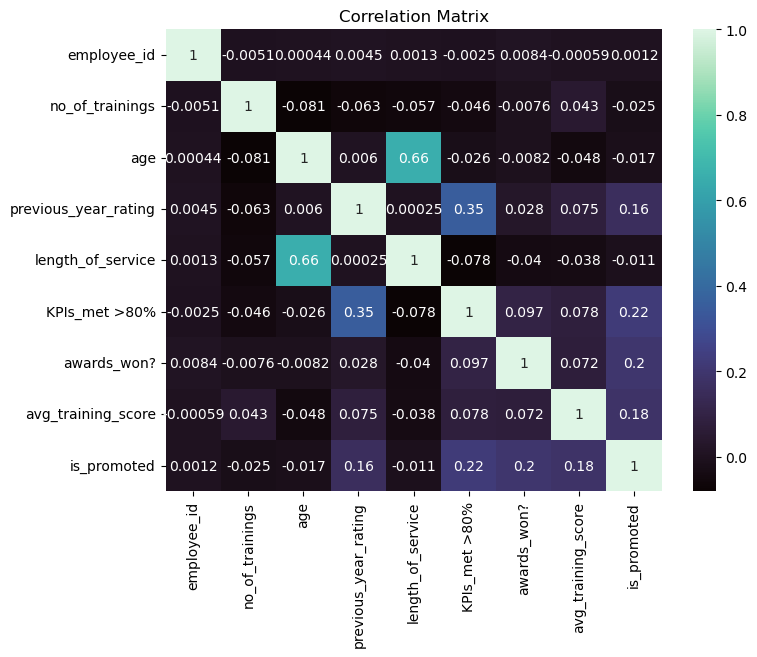

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), annot = True, cmap='mako')
plt.title('Correlation Matrix')
plt.show()

# Preprocessing

In [15]:
# checking missing value and handling

In [16]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [17]:
train['previous_year_rating'] = train['previous_year_rating'].fillna( train['previous_year_rating'].median())

In [18]:
train['education'] = train['education'].fillna( train['education'].mode()[0])

In [19]:
train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [20]:
#outlier detection and Handling

In [21]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [22]:
num_cols=[['employee_id','no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted']]

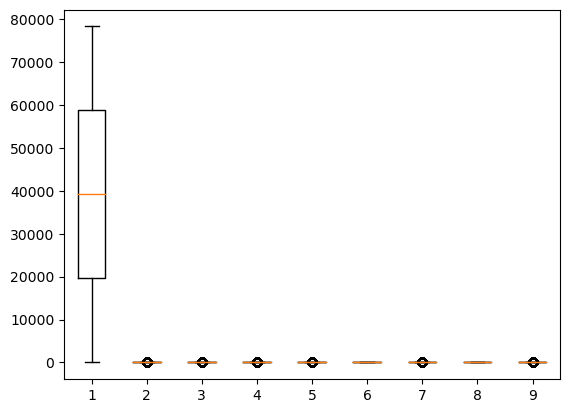

In [23]:
for i in num_cols:
    plt.boxplot(train[i])

In [24]:
# target column

#dropping unncessary column
train.drop(['employee_id'],inplace = True,axis=1)

In [25]:
x = train.drop(['is_promoted'],axis=1)
y=train['is_promoted']

In [26]:
x.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [27]:
#Encoding

In [28]:
train['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [29]:
#mapping ordinal values
dict1={f"Master's & above":2,"Bachelor's":1,"Below Secondary":0}

In [30]:
x['education']=x['education'].map(dict1)

In [31]:
x['region'].nunique()

34

In [32]:
x['gender'].nunique()

2

In [33]:
dict2={'f':1,'m':0}

In [34]:
x['gender']=x['gender'].map(dict2)

In [35]:
x['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [36]:
x.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,2,1,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,1,0,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,region_19,1,0,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,region_23,1,0,other,2,39,1.0,10,0,0,50
4,Technology,region_26,1,0,other,1,45,3.0,2,0,0,73


In [37]:
x=pd.get_dummies(x)

In [38]:
#scaling

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
x=scaler.fit_transform(x)

In [41]:
#splitting

from sklearn.model_selection import train_test_split

In [42]:
# train_test_split

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=.25,random_state=42)

In [43]:
#test dataset

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [45]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [46]:
## null value detection and handling

In [47]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [48]:
test['previous_year_rating'] = test['previous_year_rating'].fillna( test['previous_year_rating'].median())

In [49]:
test['education'] = test['education'].fillna( test['education'].mode()[0])

In [50]:
test.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [51]:
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

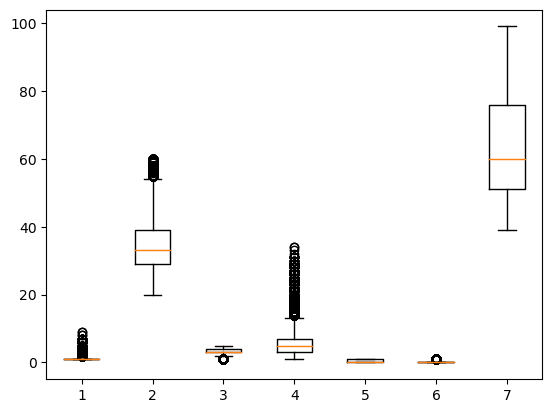

In [52]:
#outlier detection


plt.boxplot(test[['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score']])
plt.show()

C:\Users\jbnay\AppData\Local\Temp\ipykernel_2200\3161554521.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test.corr(), annot = True, cmap='mako')


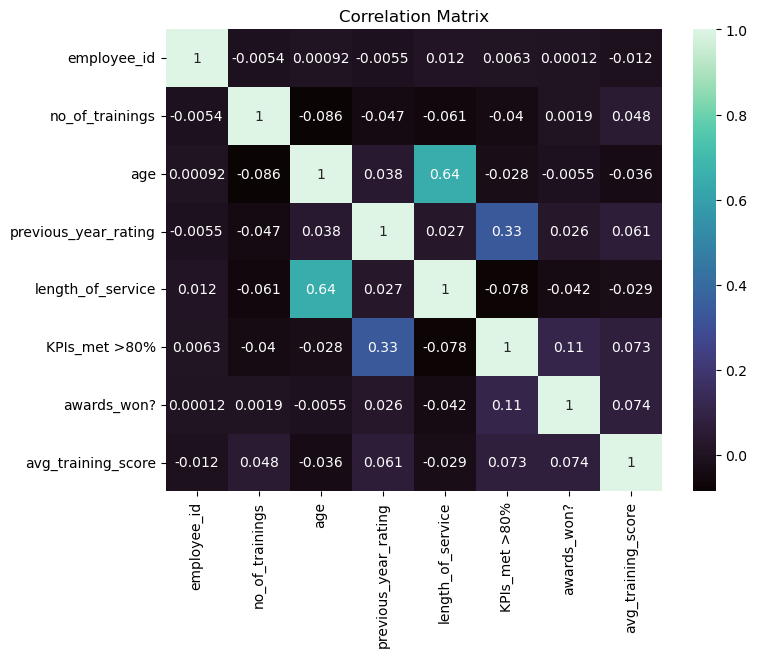

In [53]:
plt.figure(figsize=(8,6))
sns.heatmap(test.corr(), annot = True, cmap='mako')
plt.title('Correlation Matrix')
plt.show()

In [54]:
 x=test.drop(['employee_id'],axis=1)

In [55]:
#encoding

In [56]:
x=pd.get_dummies(x)

In [57]:
x.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,24,3.0,1,1,0,77,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,1,31,3.0,5,0,0,51,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2,1,31,1.0,4,0,0,47,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,3,31,2.0,9,0,0,65,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,1,30,4.0,7,0,0,61,0,1,0,...,0,0,1,0,0,0,1,0,0,1


In [58]:
scaler = StandardScaler()
x=scaler.fit_transform(x)

# Modeling

In [59]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
logit_reg = LogisticRegression()
logit_reg.fit(x_train,y_train)

LogisticRegression()

In [60]:
pred1 = logit_reg.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score

In [62]:
print('accuracy = ',accuracy_score(y_test,pred1))
print('precision = ', precision_score(y_test,pred1,average='macro'))
print('recall = ', recall_score(y_test,pred1,average='macro'))
print('f1 score = ', f1_score(y_test,pred1,average='macro'))
confusion_matrix(y_test,pred1)

accuracy =  0.9338782659465772
precision =  0.8622484125131418
recall =  0.6332637515463889
f1 score =  0.6852520415241758


array([[12487,    84],
       [  822,   309]], dtype=int64)

In [63]:
#KNN

from sklearn.neighbors import KNeighborsClassifier


In [64]:
metric_k =[]
n = np.arange(3,15)


for k in n:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'euclidean')
    classifier.fit(x_train,y_train)
    pred2  = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred2)
    metric_k.append(acc)

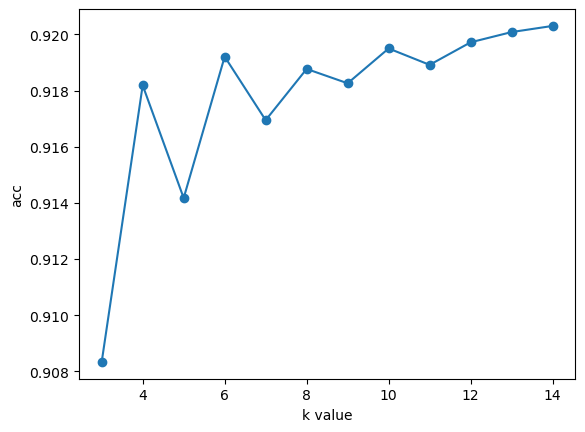

In [65]:
plt.plot(n,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('acc')
plt.show()

In [66]:
classifier = KNeighborsClassifier(n_neighbors = 14 ,metric = 'euclidean')
classifier.fit(x_train,y_train)
pred2  = classifier.predict(x_test)

In [67]:
print('accuracy = ',accuracy_score(y_test,pred2))
print('precision = ', precision_score(y_test,pred2,average='macro'))
print('recall = ', recall_score(y_test,pred2,average='macro'))
print('f1 score = ', f1_score(y_test,pred2,average='macro'))
confusion_matrix(y_test,pred2)

accuracy =  0.920303605313093
precision =  0.8179833537999728
recall =  0.5277015060205161
f1 score =  0.5323374675146316


array([[12545,    26],
       [ 1066,    65]], dtype=int64)

In [68]:
#SVM
from sklearn.svm import SVC

In [69]:
sv = SVC(kernel = 'poly',degree =3)
sv.fit(x_train,y_train)

SVC(kernel='poly')

In [70]:
pred3 = sv.predict(x_test)

In [71]:
print('accuracy = ',accuracy_score(y_test,pred3))
print('precision = ', precision_score(y_test,pred3,average='macro'))
print('recall = ', recall_score(y_test,pred3,average='macro'))
print('f1 score = ', f1_score(y_test,pred3,average='macro'))
confusion_matrix(y_test,pred3)

accuracy =  0.9259232228871698
precision =  0.8881296462445527
recall =  0.5613398654264468
f1 score =  0.589273182403748


array([[12546,    25],
       [  990,   141]], dtype=int64)

In [72]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
pred4 = tree.predict(x_test)

In [73]:
print('accuracy = ',accuracy_score(y_test,pred4))
print('precision = ', precision_score(y_test,pred4, average='macro'))
print('recall = ', recall_score(y_test,pred4, average='macro'))
print('f1 score = ', f1_score(y_test,pred4, average='macro'))
confusion_matrix(y_test,pred4)

accuracy =  0.9032987884980295
precision =  0.6850835784138862
recall =  0.6970609238376596
f1 score =  0.6908073536592907


array([[11868,   703],
       [  622,   509]], dtype=int64)

Decision tree classifier has greater f1_score

In [74]:
pred4

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [75]:
pred4 = pd.DataFrame(pred4)

In [76]:
type(pred4)

pandas.core.frame.DataFrame

In [77]:
pred4

,0
0,0
1,0
2,0
3,0
4,0
...,...
13697,0
13698,0
13699,0
13700,0


In [78]:
sample_submission=pd.read_csv(r"C:\Users\jbnay\Downloads\sample_submission_M0L0uXE.csv")

In [79]:
sample_submission.head()

,employee_id,is_promoted
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0


In [80]:
sample_submission['is_promoted']=pred4

In [81]:
result=sample_submission.to_csv(r"C:\Users\jbnay\Downloads\sample_submission_M0L0uXE.csv",index=False)

In [82]:
result